# TSML (Time Series Machine Learning)
- **Speaker:  Paulito Palmes**
- **IBM Dublin Research Lab**
- July 23, 2019

## Motivations
- innovations in industry sectors brought automations 
- automations require installation of sensor networks 
- main challenges:
  - collect large volume of data, detect anomalies, monitor status
  - discover patterns to reduce downtimes and manufacturing errors
  - reduce energy usage
  - predict faults/failures
  - effective maintenance schedules

_TSML leverages AI and ML libraries from ScikitLearn, Caret, and Julia as building blocks for processing huge amount of industrial time series data._

## Typical TSML Workflow

## First, let's create an artificial data with missing values

In [1]:
using DataFrames
using Dates
using Random
ENV["COLUMNS"]=1000 # for dataframe column size

function generateXY()
    Random.seed!(123)
    gdate = DateTime(2014,1,1):Dates.Minute(15):DateTime(2014,1,5)
    gval = Array{Union{Missing,Float64}}(rand(length(gdate)))
    gmissing = floor(0.30*length(gdate)) |> Integer
    gndxmissing = Random.shuffle(1:length(gdate))[1:gmissing]
    X = DataFrame(Date=gdate,Value=gval)
    X.Value[gndxmissing] .= missing
    Y = rand(length(gdate))
    (X,Y)
end;
(df,outY)=generateXY(); first(df,10)

,Date,Value
,DateTime,Float64⍰
1,2014-01-01T00:00:00,0.768448
2,2014-01-01T00:15:00,0.940515
3,2014-01-01T00:30:00,0.673959
4,2014-01-01T00:45:00,0.395453
5,2014-01-01T01:00:00,missing
6,2014-01-01T01:15:00,0.662555
7,2014-01-01T01:30:00,0.586022
8,2014-01-01T01:45:00,missing
9,2014-01-01T02:00:00,0.26864


## Let's load the TSML modules and filters to process data

In [ ]:
using TSML

## Let's use Pipeline with Plotter filter to plot artificial data

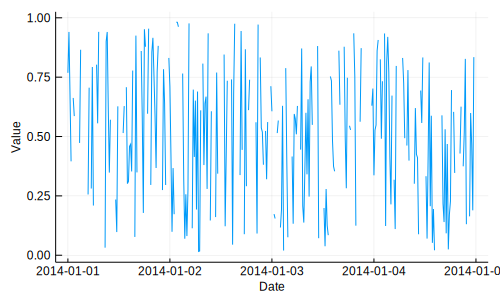

In [19]:
pltr=Plotter(Dict(:interactive => true))

mypipeline = Pipeline(Dict(
  :transformers => [pltr]
 )
)

fit!(mypipeline, df)
transform!(mypipeline, df)  

## Let's get the statistics/data quality including blocks of missing data

In [20]:
statfier = Statifier(Dict(:processmissing=>false))

mypipeline = Pipeline(Dict(
  :transformers => [statfier]
 )
)

fit!(mypipeline, df)
res = transform!(mypipeline, df)

,tstart,tend,sfreq,count,max,min,median,mean,q1,q2,q25,q75,q8,q9,kurtosis,skewness,variation,entropy,autocor,pacf
,DateTime,DateTime,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2014-01-01T00:00:00,2014-01-05T00:00:00,0.249351,270,0.995414,0.000412399,0.521184,0.505873,0.121582,0.213152,0.279623,0.745784,0.781425,0.870951,-1.14079,-0.065312,0.546211,69.5203,0.320605,0.312706


## Let's extend the Pipeline workflow with aggregate, impute, and plot 

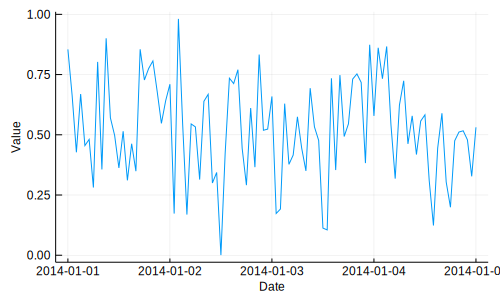

In [21]:
valgator = DateValgator(Dict(:dateinterval=>Dates.Hour(1)))

mypipeline = Pipeline(Dict(
  :transformers => [valgator,pltr]
 )
)

fit!(mypipeline, df)
transform!(mypipeline, df)

## Let's now try real data

In [22]:
fname = joinpath(dirname(pathof(TSML)),"../data/testdata.csv")
csvreader = CSVDateValReader(Dict(:filename=>fname,:dateformat=>"dd/mm/yyyy HH:MM"))

outputname = joinpath(dirname(pathof(TSML)),"/tmp/testdata_output.csv")
csvwriter = CSVDateValWriter(Dict(:filename=>outputname))

valgator = DateValgator(Dict(:dateinterval=>Dates.Hour(1)))
valputer = DateValNNer(Dict(:dateinterval=>Dates.Hour(1)))
stfier = Statifier(Dict(:processmissing=>true))
outliernicer = Outliernicer(Dict(:dateinterval=>Dates.Hour(1)));

## Let's plot the real data and check for missing values

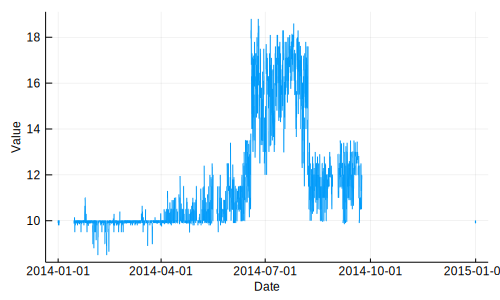

In [23]:
mpipeline1 = Pipeline(Dict(
  :transformers => [csvreader,valgator,pltr]
 )
)

fit!(mpipeline1)
transform!(mpipeline1)

## Let's get the statistics to assess data quality

In [24]:
mpipeline1 = Pipeline(Dict(
  :transformers => [csvreader,valgator,stfier]
 )
)

fit!(mpipeline1)
respipe1 = transform!(mpipeline1)

,tstart,tend,sfreq,count,max,min,median,mean,q1,q2,q25,q75,q8,q9,kurtosis,skewness,variation,entropy,autocor,pacf,bmedian,bmean,bq25,bq75,bmin,bmax
,DateTime,DateTime,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2014-01-01T00:00:00,2015-01-01T00:00:00,0.999886,3830,18.8,8.5,10.35,11.557,9.9,10.0,10.0,12.3,13.0,16.0,0.730635,1.41283,0.200055,-1.09145e5,4.39315,1.04644,5.0,10.5589,3.0,6.0,1.0,2380.0


## Let's try imputing and verify the statistical features

In [25]:
mpipeline2 = Pipeline(Dict(
  :transformers => [csvreader,valgator,valputer,statfier]
 )
)

fit!(mpipeline2)
respipe2 = transform!(mpipeline2)

,tstart,tend,sfreq,count,max,min,median,mean,q1,q2,q25,q75,q8,q9,kurtosis,skewness,variation,entropy,autocor,pacf
,DateTime,DateTime,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2014-01-01T00:00:00,2015-01-01T00:00:00,0.999886,8761,18.8,8.5,10.0,11.1362,9.95,10.0,10.0,11.5,12.0,14.95,2.37274,1.87452,0.187997,-2.36714e5,4.47886,1.06917


## Let's visualize the imputted data

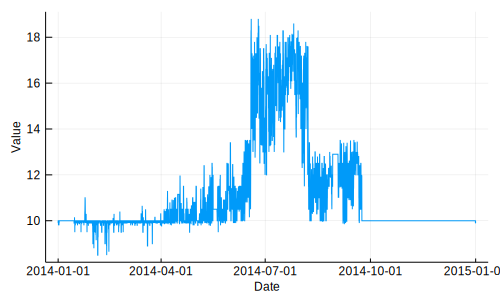

In [26]:
mpipeline2 = Pipeline(Dict(
  :transformers => [csvreader,valgator,valputer,pltr]
 )
)

fit!(mpipeline2)
transform!(mpipeline2)

## Let's have examples of Monotonic data

In [27]:
regularfile = joinpath(dirname(pathof(TSML)),"../data/typedetection/regular.csv")
monofile = joinpath(dirname(pathof(TSML)),"../data/typedetection/monotonic.csv")
dailymonofile = joinpath(dirname(pathof(TSML)),"../data/typedetection/dailymonotonic.csv")

regularfilecsv = CSVDateValReader(Dict(:filename=>regularfile,:dateformat=>"dd/mm/yyyy HH:MM"))
monofilecsv = CSVDateValReader(Dict(:filename=>monofile,:dateformat=>"dd/mm/yyyy HH:MM"))
dailymonofilecsv = CSVDateValReader(Dict(:filename=>dailymonofile,:dateformat=>"dd/mm/yyyy HH:MM"))

valgator = DateValgator(Dict(:dateinterval=>Dates.Hour(1)))
valputer = DateValNNer(Dict(:dateinterval=>Dates.Hour(1)))
stfier = Statifier(Dict(:processmissing=>true))
mononicer = Monotonicer(Dict())
stfier = Statifier(Dict(:processmissing=>true))
outliernicer = Outliernicer(Dict(:dateinterval=>Dates.Hour(1)));

## Let's plot an example of monotonic data

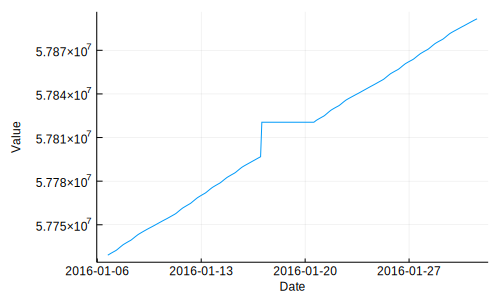

In [28]:
monopipeline = Pipeline(Dict(
  :transformers => [monofilecsv,valgator,valputer,pltr]
 )
)

fit!(monopipeline)
transform!(monopipeline)

## Let's plot after normalizing the monotonic data

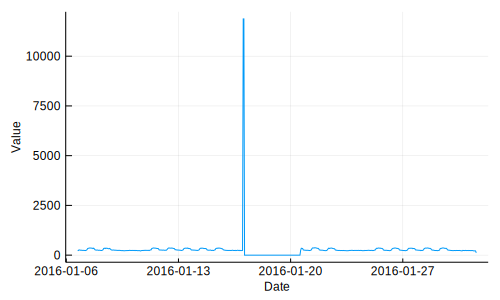

In [29]:
monopipeline = Pipeline(Dict(
  :transformers => [monofilecsv,valgator,valputer,mononicer, pltr]
 )
)

fit!(monopipeline)
transform!(monopipeline)

## Let's remove outliers and plot the result

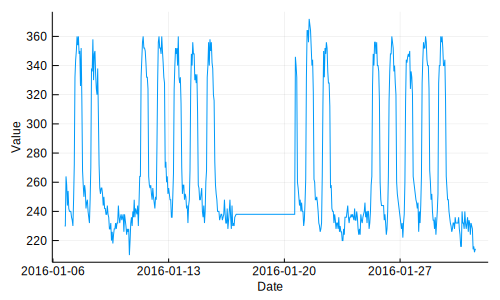

In [30]:
monopipeline = Pipeline(Dict(
  :transformers => [monofilecsv,valgator,valputer,mononicer,outliernicer,pltr]
 )
)

fit!(monopipeline)
transform!(monopipeline)


## Let's plot and example of a daily monotonic data

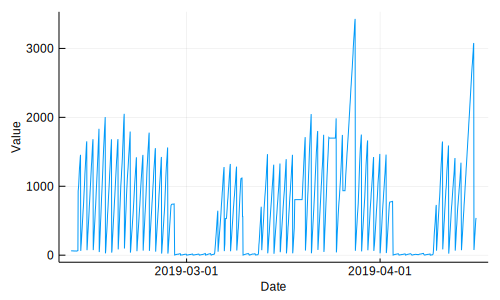

In [31]:
dailymonopipeline = Pipeline(Dict(
  :transformers => [dailymonofilecsv,valgator,valputer,pltr]
 )
)

fit!(dailymonopipeline)
transform!(dailymonopipeline)

## Let's normalize and plot

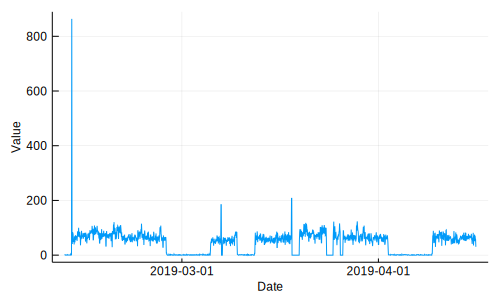

In [32]:
dailymonopipeline = Pipeline(Dict(
  :transformers => [dailymonofilecsv,valgator,valputer,mononicer,pltr]
 )
)
fit!(dailymonopipeline)
transform!(dailymonopipeline)

## Let's add the Outliernicer filter and plot

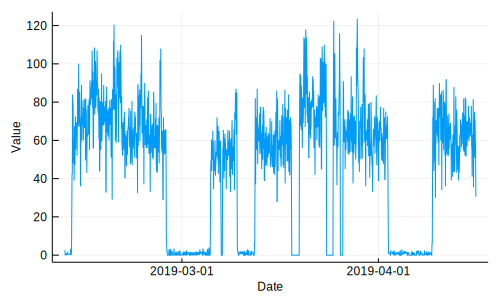

In [33]:
dailymonopipeline = Pipeline(Dict(
  :transformers => [dailymonofilecsv,valgator,valputer,mononicer,outliernicer,pltr]
 )
)
fit!(dailymonopipeline)
transform!(dailymonopipeline)

## Let's use what we have learned so far to perform automatic data type classification

In [34]:
using TSML: TSClassifier
Random.seed!(12)

trdirname = joinpath(dirname(pathof(TSML)),"../data/realdatatsclassification/training")
tstdirname = joinpath(dirname(pathof(TSML)),"../data/realdatatsclassification/testing")
modeldirname = joinpath(dirname(pathof(TSML)),"../data/realdatatsclassification/model")

tscl = TSClassifier(Dict(:trdirectory=>trdirname,
           :tstdirectory=>tstdirname,
           :modeldirectory=>modeldirname,
           :feature_range => 6:20,
           :num_trees=>50)
)

fit!(tscl)
dfresults = transform!(tscl);
apredict = dfresults.predtype
fnames = dfresults.fname
myregex = r"(?<dtype>[A-Z _ - a-z]+)(?<number>\d*).(?<ext>\w+)"
mtypes=map(fnames) do fname
  mymatch=match(myregex,fname)
  mymatch[:dtype]
end

sum(mtypes .== apredict)/length(mtypes) * 100 |> x-> round(x,digits=2)

getting stats of AirOffTemp1.csv
getting stats of AirOffTemp2.csv
getting stats of AirOffTemp3.csv
getting stats of Energy1.csv
getting stats of Energy10.csv
getting stats of Energy2.csv
getting stats of Energy3.csv
getting stats of Energy4.csv
getting stats of Energy6.csv
getting stats of Energy7.csv
getting stats of Energy8.csv
getting stats of Energy9.csv
getting stats of Pressure1.csv
getting stats of Pressure3.csv
getting stats of Pressure4.csv
getting stats of Pressure6.csv
getting stats of RetTemp11.csv
getting stats of RetTemp21.csv
getting stats of RetTemp41.csv
getting stats of RetTemp51.csv
getting stats of AirOffTemp4.csv
getting stats of AirOffTemp5.csv
getting stats of Energy5.csv
getting stats of Pressure5.csv
getting stats of RetTemp31.csv
loading model from file: /Users/ppalmes/.julia/packages/TSML/lqjQn/src/../data/realdatatsclassification/model/juliarfmodel.serialized


80.0

## TSML features
- TS data type clustering/classification for automatic data discovery
- TS aggregation based on date/time interval
- TS imputation based on symmetric Nearest Neighbors
- TS statistical metrics for data quality assessment
- TS ML wrapper with more than 100+ libraries from caret, scikitlearn, and julia
- TS date/value matrix conversion of 1-D TS using sliding windows for ML input

## More TSML features
- Common API wrappers for ML libs from JuliaML, PyCall, and RCall
- Pipeline API allows high-level description of the processing workflow
- Specific cleaning/normalization workflow based on data type
- Automatic selection of optimised ML model
- Automatic segmentation of time-series data into matrix form for ML training and prediction
- Easily extensible architecture by using just two main interfaces: fit and transform
- Meta-ensembles for robust prediction
- Support for distributed computation, for scalability, and speed